In [1]:
!unzip '/content/drive/MyDrive/Deep_learning/Datasets/fake-news.zip'

Archive:  /content/drive/MyDrive/Deep_learning/Datasets/fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!pip install keras-tuner

In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/content/train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


(array([0, 1]), array([10361,  7924]))


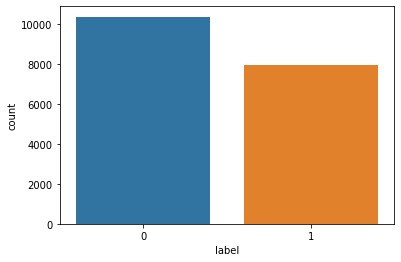

In [10]:
count = np.unique(df['label'], return_counts=True)
print(count)
sns.countplot(x='label', data = df)

In [11]:
X = df.drop('label',axis=1)
y = df['label']

In [15]:
messages = X.copy()
messages.reset_index(inplace=True)

## Pre processing and data cleaning

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
ps = PorterStemmer()
temp = []
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    # review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    # review = ' '.join(review)
    # corpus.append(review)

    for word in review:
      if word not in stopwords.words('english'):
        temp.append(ps.stem(word))

    temp = ' '.join(temp)
    corpus.append(temp)
    temp = []    

In [47]:
print(corpus)

['hous dem aid even see comey letter jason chaffetz tweet', 'flynn hillari clinton big woman campu breitbart', 'truth might get fire', 'civilian kill singl us airstrik identifi', 'iranian woman jail fiction unpublish stori woman stone death adulteri', 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart', 'beno hamon win french socialist parti presidenti nomin new york time', 'back channel plan ukrain russia courtesi trump associ new york time', 'obama organ action partner soro link indivis disrupt trump agenda', 'bbc comedi sketch real housew isi caus outrag', 'russian research discov secret nazi militari base treasur hunter arctic photo', 'us offici see link trump russia', 'ye paid govern troll social media blog forum websit', 'major leagu soccer argentin find home success new york time', 'well fargo chief abruptli step new york time', 'anonym donor pay million releas everyon arrest dakota access pipelin', 'fbi close hillari', 'chuck todd

## One hot representation

In [49]:
# Vocabulary size
voc_size=5000

In [50]:
onehot_repr = []
for words in corpus:
  temp2 = one_hot(words,voc_size)
  onehot_repr.append(temp2)
print(onehot_repr)

[[3866, 2328, 1904, 1132, 1790, 727, 328, 3974, 1478, 2174], [2593, 1961, 1921, 4624, 3019, 470, 1349], [2017, 958, 3977, 1114], [3490, 2778, 1271, 4162, 1521, 1424], [3401, 3019, 2967, 915, 3908, 2622, 3019, 3243, 3011, 1994], [880, 916, 2642, 4018, 1735, 152, 1244, 1425, 2868, 2055, 3008, 1742, 2977, 392, 1349], [2467, 4066, 988, 1905, 1623, 3500, 1611, 244, 4899, 3478, 4347], [1192, 3319, 4197, 909, 3508, 4228, 152, 3992, 4899, 3478, 4347], [3753, 1199, 4822, 1130, 2529, 304, 150, 1055, 152, 2431], [95, 837, 4790, 480, 67, 1275, 598, 1629], [714, 1968, 2756, 3233, 4980, 2006, 2132, 2344, 3111, 2550, 2888], [4162, 2392, 1790, 304, 152, 3508], [1294, 2359, 3019, 2826, 585, 716, 3276, 236, 319], [3416, 3176, 1984, 211, 1379, 2623, 4344, 4899, 3478, 4347], [1163, 2935, 3286, 4051, 2600, 4899, 3478, 4347], [274, 4177, 4926, 2420, 2342, 1279, 4428, 3198, 3188, 1577], [195, 2447, 1961], [3590, 2136, 2724, 1442, 152, 3184, 1440, 1349], [1993, 855, 1921, 150, 1649, 2411, 488, 2585, 2622], [1

In [53]:
counts = []
for j in onehot_repr:
  counts.append(len(j))
print(max(counts))

47


In [58]:
sent_length=60
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3974 1478 2174]
 [   0    0    0 ... 3019  470 1349]
 [   0    0    0 ...  958 3977 1114]
 ...
 [   0    0    0 ... 4899 3478 4347]
 [   0    0    0 ... 1270 4415 1497]
 [   0    0    0 ... 1928 3677 1982]]


In [62]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(12250, 12250, 6035, 6035)

In [73]:
def build_model(hp):
    embedding_vector_features=40
    model = keras.Sequential()
    model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
    model.add(
        layers.LSTM(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
        )
    )
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [74]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="weights",
)

In [75]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [76]:
tuner.search(X_train,y_train,epochs=3,validation_data=(X_test,y_test))

Trial 3 Complete [00h 01m 25s]
val_accuracy: 0.9143330454826355

Best val_accuracy So Far: 0.9215410351753235
Total elapsed time: 00h 03m 58s
INFO:tensorflow:Oracle triggered exit


In [77]:
tuner.results_summary()

Results summary
Results in my_dir/weights
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 320
learning_rate: 0.001
Score: 0.9215410351753235
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.001
Score: 0.9207125306129456
Trial summary
Hyperparameters:
units: 448
learning_rate: 0.0001
Score: 0.9143330454826355


In [78]:
model = tuner.get_best_models(num_models=1)[0]

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 320)               462080    
_________________________________________________________________
dense (Dense)                (None, 1)                 321       
Total params: 662,401
Trainable params: 662,401
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), initial_epoch=3)

Epoch 4/10
383/383 [==============================] - 13s 28ms/step - loss: 0.0719 - accuracy: 0.9733 - val_loss: 0.2584 - val_accuracy: 0.9165
Epoch 5/10
383/383 [==============================] - 10s 26ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.2952 - val_accuracy: 0.9170
Epoch 6/10
383/383 [==============================] - 10s 26ms/step - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.3935 - val_accuracy: 0.9155
Epoch 7/10
383/383 [==============================] - 10s 26ms/step - loss: 0.0145 - accuracy: 0.9945 - val_loss: 0.4500 - val_accuracy: 0.9079
Epoch 8/10
383/383 [==============================] - 10s 26ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.5178 - val_accuracy: 0.9095
Epoch 9/10
383/383 [==============================] - 10s 26ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.5486 - val_accuracy: 0.9165
Epoch 10/10
383/383 [==============================] - 10s 26ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.6440 - val_accuracy

In [82]:
y_pred=model.predict(X_test)

In [85]:
y_pred = y_pred>0.5

In [88]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,3132,287
1,221,2395


In [91]:
accuracy_score(y_test,y_pred)

0.915824357912179

# Prediction on Test data

In [92]:
dataset = pd.read_csv('/content/test.csv')

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [94]:
dataset = dataset.dropna()

In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4575 non-null   int64 
 1   title   4575 non-null   object
 2   author  4575 non-null   object
 3   text    4575 non-null   object
dtypes: int64(1), object(3)
memory usage: 178.7+ KB


In [96]:
dataset.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."


In [99]:
dataset['title']

0       Specter of Trump Loosens Tongues, if Not Purse...
2       #NoDAPL: Native American Leaders Vow to Stay A...
3       Tim Tebow Will Attempt Another Comeback, This ...
4                         Keiser Report: Meme Wars (E995)
6       Pelosi Calls for FBI Investigation to Find Out...
                              ...                        
5194    Trump on If ’Tapes’ Exist of Comey Conversatio...
5195    The Bangladeshi Traffic Jam That Never Ends - ...
5196    John Kasich Signs One Abortion Bill in Ohio bu...
5197    California Today: What, Exactly, Is in Your Su...
5199    Awkward Sex, Onscreen and Off - The New York T...
Name: title, Length: 4575, dtype: object

In [108]:
messages = dataset.copy()
messages.reset_index(inplace=True)

In [ ]:
ps = PorterStemmer()
temp = []
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    # review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    # review = ' '.join(review)
    # corpus.append(review)

    for word in review:
      if word not in stopwords.words('english'):
        temp.append(ps.stem(word))

    temp = ' '.join(temp)
    corpus.append(temp)
    temp = []   

In [111]:
print(corpus)

['specter trump loosen tongu purs string silicon valley new york time', 'nodapl nativ american leader vow stay winter file lawsuit polic', 'tim tebow attempt anoth comeback time basebal new york time', 'keiser report meme war e', 'pelosi call fbi investig find russian donald trump breitbart', 'weekli featur profil randi shannon', 'u gener admir endors trump command chief', 'work class hero john brennon', 'rise mandatori vaccin mean end medic freedom', 'communist terror small busi', 'comput programm come forward admit paid rig vote booth trump right usa newsflash', 'thiev take chunk chang pound berlin museum new york time', 'new england patriot owner still sore n f l payback sight new york time', 'colleg republican yaf sue berkeley ann coulter event breitbart', 'trump melt accus us postal servic steal elect clinton', 'visit madagascar leav red swimsuit lemur recip home new york time', 'rees peanut butter cup cheap full toxic chemic', 'presid obama presid elect donald trump meet white ho

In [112]:
# Vocabulary size
voc_size=5000

In [113]:
onehot_repr = []
for words in corpus:
  temp2 = one_hot(words,voc_size)
  onehot_repr.append(temp2)
print(onehot_repr)

[[3253, 152, 3775, 7, 4261, 3649, 286, 3811, 4899, 3478, 4347], [4789, 1424, 488, 4346, 4678, 1650, 2808, 789, 3958, 3443], [2260, 4275, 1639, 2405, 2953, 4347, 4226, 4899, 3478, 4347], [893, 163, 751, 4564, 4712], [2788, 395, 195, 4931, 1379, 714, 1442, 152, 1349], [159, 2876, 780, 4104, 688], [1935, 3513, 720, 1729, 152, 4432, 3286], [4070, 4343, 3350, 2851, 2581], [693, 3525, 851, 4304, 4278, 2567, 968], [2349, 1130, 682, 3993], [2983, 1136, 2756, 1446, 3172, 2359, 2294, 4850, 2470, 152, 3915, 4872, 3723], [4896, 2190, 4364, 1600, 4143, 1779, 1717, 4899, 3478, 4347], [4899, 2220, 1552, 4902, 4073, 1045, 4005, 3677, 3767, 1605, 2304, 4899, 3478, 4347], [3517, 4386, 3977, 758, 3068, 3241, 2841, 276, 1349], [152, 1146, 591, 4162, 3371, 2178, 2528, 2238, 1921], [1997, 2710, 4830, 4501, 194, 1520, 4407, 2623, 4899, 3478, 4347], [3110, 4132, 3765, 2281, 4089, 1304, 4026, 3648], [4447, 3753, 4447, 2238, 1442, 152, 3592, 1892, 3866], [480, 4524, 1224, 152, 988, 873], [3241, 2841, 2677, 3755

In [114]:
sent_length=60
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4899 3478 4347]
 [   0    0    0 ...  789 3958 3443]
 [   0    0    0 ... 4899 3478 4347]
 ...
 [   0    0    0 ... 4899 3478 4347]
 [   0    0    0 ... 4899 3478 4347]
 [   0    0    0 ... 4899 3478 4347]]


In [121]:
test_prediction = model.predict(embedded_docs)
result = np.multiply(test_prediction>0.5, 1)
result

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [135]:
val = result.tolist()
final_result = []
for k in val:
  final_result.append(k[0])
print(final_result)

[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 

In [137]:
dictionary = {
    'id':dataset['id'],
    'label':final_result
}
submission = pd.DataFrame(dictionary)
submission.to_csv('submission.csv',index=False)